# Random Forest Pipeline

In [158]:
#importing modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [159]:
#loading train dataset
df_full = pd.read_csv(r"titanic_2.csv")
print(df_full.shape)
#df_full.head()

(712, 20)


In [160]:
#breaking down into X and y arrays, removing categorical vars: train
X = df_full.drop(['Survived','Name','Sex','Ticket','Embarked','Pclass'], axis = 1)
y = pd.DataFrame(df_full['Survived'])
print(X.shape)
print(y.shape)
#X.head()

(712, 14)
(712, 1)


In [161]:
#train, dev split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1)

In [163]:
#random forest - main
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

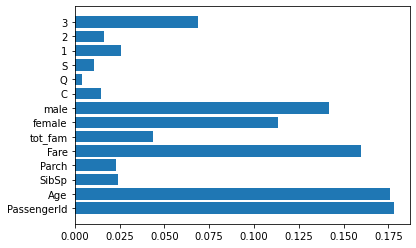

In [164]:
#feature importance
pyplot.barh(X_train.columns, clf.feature_importances_)
pyplot.show()

In [165]:
#prediction y for dev data 
y_pred_dev=clf.predict(X_dev)

In [166]:
y_dev = y_dev['Survived'].to_numpy()
y_dev

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [167]:
confusion_matrix = (metrics.confusion_matrix(y_dev, y_pred_dev, labels=[0,1]))
print(confusion_matrix)

[[37  7]
 [ 7 21]]


In [169]:
#calculating accuracy and other scores
accuracy_dev = metrics.accuracy_score(y_dev, y_pred_dev)
print('accuracy is: '+ str(accuracy_dev))
precision_dev = metrics.precision_score(y_dev, y_pred_dev)
print(precision_dev)
sensitivity_dev = metrics.recall_score(y_dev, y_pred_dev)
print(sensitivity_dev)
f1_score_dev = metrics.f1_score(y_dev, y_pred_dev)
print(f1_score_dev)

accuracy is: 0.8055555555555556
0.75
0.75
0.75


## Test pipeline-predicts and creates submission csv

In [236]:
#loading test dataset
df_full_test = pd.read_csv(r"test.csv")
print(df_full_test.shape)
#df_full_test.head()

(418, 11)


In [237]:
#making the test data in the same format as X_train
X_test = df_full_test.drop(['Cabin'], axis = 1)
X_test['tot_fam'] = X_test['SibSp'] + X_test['Parch']
#X_test.head()

In [238]:
dummy_sex = pd.get_dummies(X_test['Sex'])
X_test = pd.concat([X_test, dummy_sex], axis=1)

In [239]:
dummy_embark = pd.get_dummies(X_test['Embarked'])
X_test = pd.concat([X_test, dummy_embark], axis=1)
#X_test.head()

In [240]:
dummy_pclass = pd.get_dummies(X_test['Pclass'])
X_test = pd.concat([X_test, dummy_pclass], axis=1)
#X_test.head()

In [241]:
X_test = X_test.drop(['Name','Sex','Ticket','Embarked','Pclass'], axis = 1)
print(X_test.shape)
#X_test.head()

(418, 14)


In [242]:
print(X_train.columns)
print(X_test.columns)

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'tot_fam', 'female',
       'male', 'C', 'Q', 'S', '1', '2', '3'],
      dtype='object')
Index(['PassengerId',         'Age',       'SibSp',       'Parch',
              'Fare',     'tot_fam',      'female',        'male',
                 'C',           'Q',           'S',             1,
                   2,             3],
      dtype='object')


In [243]:
X_test.PassengerId.isnull().value_counts()

False    418
Name: PassengerId, dtype: int64

In [246]:
#calculates fill rate for columns
fill_rate = {}
for i in X_test:
    null_count = (X_test[i].isna().sum())
    frate = 100-(null_count/891)*100
    fill_rate[i]=frate

#converts fill rate from dictionary to a dataframe
fillrate_df = pd.DataFrame((fill_rate.items()), columns = ['column_name', 'fill_rate'])
fillrate_df

,column_name,fill_rate
0,PassengerId,100.000000
1,Age,90.347924
2,SibSp,100.000000
3,Parch,100.000000
4,Fare,99.887767
5,tot_fam,100.000000
6,female,100.000000
7,male,100.000000
8,C,100.000000
9,Q,100.000000


In [ ]:
#prediction y for dev data 
y_pred_test=clf.predict(X_test)

In [209]:
y_pred_test_df.shape

(331, 1)

In [213]:
y_pred_test_df.head()
X_test.head()

,PassengerId,Age,SibSp,Parch,Fare,tot_fam,female,male,C,Q,S,1,2,3
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,0,0,1
1,893,47.0,1,0,7.0000,1,1,0,0,0,1,0,0,1
2,894,62.0,0,0,9.6875,0,0,1,0,1,0,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,0,1,0,0,1
4,896,22.0,1,1,12.2875,2,1,0,0,0,1,0,0,1


In [221]:
X_concat = X_test[['PassengerId']]
X_concat.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [234]:
#creating final submission csv
y_pred_test_df = pd.DataFrame(y_pred_test)
y_pred_test_df.rename(columns = {0:'Survived'},inplace = True)
csv_submission = pd.merge(X_concat,y_pred_test_df, left_index=True, right_index=True)
csv_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [235]:
csv_submission.PassengerId.isnull().value_counts()

False    260
Name: PassengerId, dtype: int64

In [196]:
csv_submission.to_csv('csv_submission.csv', index = False)

In [ ]:
#automated iteration tracker 
iteration = 
accuracy = upar se
f1_score = 

description = ''



In [ ]:
#grid search for hyper parameter tuning
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)